In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
!pip install holidays
import holidays
sns.color_palette("dark:#5A9_r", as_cmap=True)
from functions import convert_to_geometry
import geopandas as gpd
from shapely.geometry import Point, MultiPolygon
import PIL
import io

## EDA 

In [2]:
data = pd.read_csv("../data/cleaned_data_01.csv",sep=',',parse_dates=['Date Created', 'Date Closed'])
data.head(20)

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,Address,Lat,Long,Location,Ticket Source,Calendar Year,Count,Geometry Point,Duration
0,8006878572,2013-01-05,2013-01-07,Closed,Vandalism/Graffiti,Park Structure,Parks,GLENORA,Glenora Community League,Nakota Isga,102 AVENUE NW,53.543041,-113.549596,"(53.543040723973064, -113.54959643094784)",Phone Call,2013,1,POINT (-113.5495964309478 53.54304072397306),2 days
1,8006890973,2013-01-07,2013-01-22,Closed,Snow & Ice Maintenance,Road Snow Removal,Roadway Operations,PARSONS INDUSTRIAL,Oak Hills Community League,Karhiio,97 STREET NW,53.463115,-113.480121,"(53.46311528383212, -113.48012134685986)",Phone Call,2013,1,POINT (-113.4801213468599 53.46311528383212),15 days
2,8006897181,2013-01-08,2013-01-30,Closed,Traffic Lights & Signs,Damaged Non-Emergency Signs (i.e. Speed Limit),Traffic Engineering,EAUX CLAIRES,Evansdale Community League,tastawiyiniwak,9630 157 AVENUE NW,53.617962,-113.490432,"(53.61796182488794, -113.49043222829481)",Phone Call,2013,1,POINT (-113.4904322282948 53.61796182488794),22 days
3,8006925519,2013-01-14,2013-01-14,Closed,Snow & Ice Maintenance,Road Snow Removal,Roadway Operations,PARSONS INDUSTRIAL,Oak Hills Community League,Karhiio,97 STREET NW,53.463115,-113.480121,"(53.46311528383212, -113.48012134685986)",Phone Call,2013,1,POINT (-113.4801213468599 53.46311528383212),0 days
4,8006936182,2013-01-15,2013-01-16,Closed,Maintenance - Road Services & Repairs,PONDING:Road Flooding,Roadway Maintenance,MAYFIELD,Mayfield Community League,Nakota Isga,16306 109 AVENUE NW,53.554164,-113.602476,"(53.55416409862749, -113.60247580557123)",Phone Call,2013,1,POINT (-113.6024758055712 53.55416409862749),1 days
5,8006940500,2013-01-16,2014-01-16,Open,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,MCINTYRE INDUSTRIAL,Willowby Community League,Karhiio,ROPER ROAD NW,53.488368,-113.452390,"(53.48836824946695, -113.45239046293844)",Phone Call,2013,1,POINT (-113.4523904629384 53.48836824946695),365 days
6,8006943226,2013-01-16,2014-01-16,Open,Potholes,POTHOLE:Road Pothole,Roadway Maintenance,MCINTYRE INDUSTRIAL,Pleasantview Community League,Karhiio,ROPER ROAD NW,53.492682,-113.442676,"(53.49268161123974, -113.44267589261601)",Phone Call,2013,1,POINT (-113.442675892616 53.49268161123974),365 days
7,8006944488,2013-01-17,2013-01-24,Closed,Snow & Ice Maintenance,Road Snow Removal,Roadway Operations,BANNERMAN,Bannerman Community League,Dene,14227 24 STREET NW,53.606614,-113.378549,"(53.60661411080788, -113.37854931161037)",Phone Call,2013,1,POINT (-113.3785493116104 53.60661411080788),7 days
8,8006957819,2013-01-19,2013-01-28,Closed,Maintenance - Snow & Ice,Plow Request,Roadway Maintenance,MCINTYRE INDUSTRIAL,Empire Park S. W. Community League,Karhiio,51 AVENUE NW,53.488018,-113.442662,"(53.48801775225889, -113.44266169738886)",Phone Call,2013,1,POINT (-113.4426616973889 53.48801775225889),9 days
9,8006956629,2013-01-19,2013-02-01,Closed,Traffic Lights & Signs,Signal Timing (Green Light),Traffic Engineering,EDMONTON RESEARCH AND DEVELOPMENT PARK,Knottwood Community League,Karhiio,23 AVENUE NW,53.451823,-113.466590,"(53.45182295611978, -113.4665900758511)",Phone Call,2013,1,POINT (-113.4665900758511 53.45182295611978),13 days


In [3]:
data.shape

(834125, 19)

In [4]:
data.dtypes

Reference Number             int64
Date Created        datetime64[ns]
Date Closed         datetime64[ns]
Request Status              object
Service Category            object
Service Code                object
Business Unit               object
Neighbourhood               object
Community League            object
Ward                        object
Address                     object
Lat                        float64
Long                       float64
Location                    object
Ticket Source               object
Calendar Year                int64
Count                        int64
Geometry Point              object
Duration                    object
dtype: object

In [5]:
data.isna().sum()

Reference Number    0
Date Created        0
Date Closed         0
Request Status      0
Service Category    0
Service Code        0
Business Unit       0
Neighbourhood       0
Community League    0
Ward                0
Address             0
Lat                 0
Long                0
Location            0
Ticket Source       0
Calendar Year       0
Count               0
Geometry Point      0
Duration            0
dtype: int64

### EDA

Using neighbourhoods file to create Edmonton neighbourhoods boundaries for analyis

In [13]:
#Loading the data
edmonton = pd.read_csv('../data/neighbourhoods-data.csv',sep=',')

# Convert 'Geometry Multipolygon' from WKT to Shapely geometries
edmonton['Geometry Multipolygon'] = edmonton['Geometry Multipolygon'].apply(convert_to_geometry)

#creating a GeoDataframe
edmonton_gdf = gpd.GeoDataFrame(edmonton,geometry='Geometry Multipolygon')

#setting the coordinate reference system (CRS)
edmonton_gdf.set_crs(epsg=32612,inplace=True)

#saving it as a shape file
edmonton_gdf.to_file('../shape-files/edmonton_neighbourhoods.shp'
                     )

In [14]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Reference Number,834125.0,6061052837.783722,52041603.0,514086466.0,8017219245.0,8022292062.0,8026163419.0,3341321165.056143
Date Created,834125,2019-09-01 04:29:43.588790784,2013-01-05 00:00:00,2017-09-01 00:00:00,2019-09-10 00:00:00,2022-01-20 00:00:00,2024-07-23 00:00:00,NaN
Date Closed,834125,2019-09-20 10:33:36.725070592,2013-01-07 00:00:00,2017-09-25 00:00:00,2019-10-07 00:00:00,2022-01-29 00:00:00,2025-07-23 00:00:00,NaN
Lat,834125.0,53.526439,53.337684,53.479758,53.530514,53.570627,53.716072,0.060433
Long,834125.0,-113.505706,-113.713619,-113.55142,-113.500467,-113.451414,-113.282514,0.075247
Request Year,834125.0,2019.206266,2013.0,2017.0,2019.0,2022.0,2024.0,2.839884
Count,834125.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Request Month,834125.0,6.051797,1.0,3.0,6.0,9.0,12.0,3.370099
Request Day,834125.0,15.73333,1.0,9.0,16.0,23.0,31.0,8.599978
Source_Apps,834125.0,0.394247,0.0,0.0,0.0,1.0,1.0,0.488689


In [15]:
data.dtypes

Reference Number             int64
Date Created        datetime64[ns]
Date Closed         datetime64[ns]
Request Status              object
Service Category            object
Service Code                object
Business Unit               object
Neighbourhood               object
Community League            object
Ward                        object
Address                     object
Lat                        float64
Long                       float64
Location                    object
Ticket Source               object
Request Year                 int64
Count                        int64
Geometry Point              object
Closing Duration            object
Request Month                int32
Request Day                  int32
Source_Apps                  int32
Source_Calls                 int32
Source_Emails                int32
Source_Research              int32
Source_Web Forms             int32
dtype: object

Requests by Year and Month

In [16]:
data = data[data['Request Year'] != 2013]

In [17]:
# Count the number of requests per year
request_year_month_counts = data.groupby(by=['Request Year','Request Month']).size().reset_index(name='Count')
request_year_month_counts

,Request Year,Request Month,Count
0,2014,1,14227
1,2014,2,2044
2,2014,3,4935
3,2014,4,4803
4,2014,5,4646
...,...,...,...
122,2024,3,5093
123,2024,4,6022
124,2024,5,6851
125,2024,6,7384


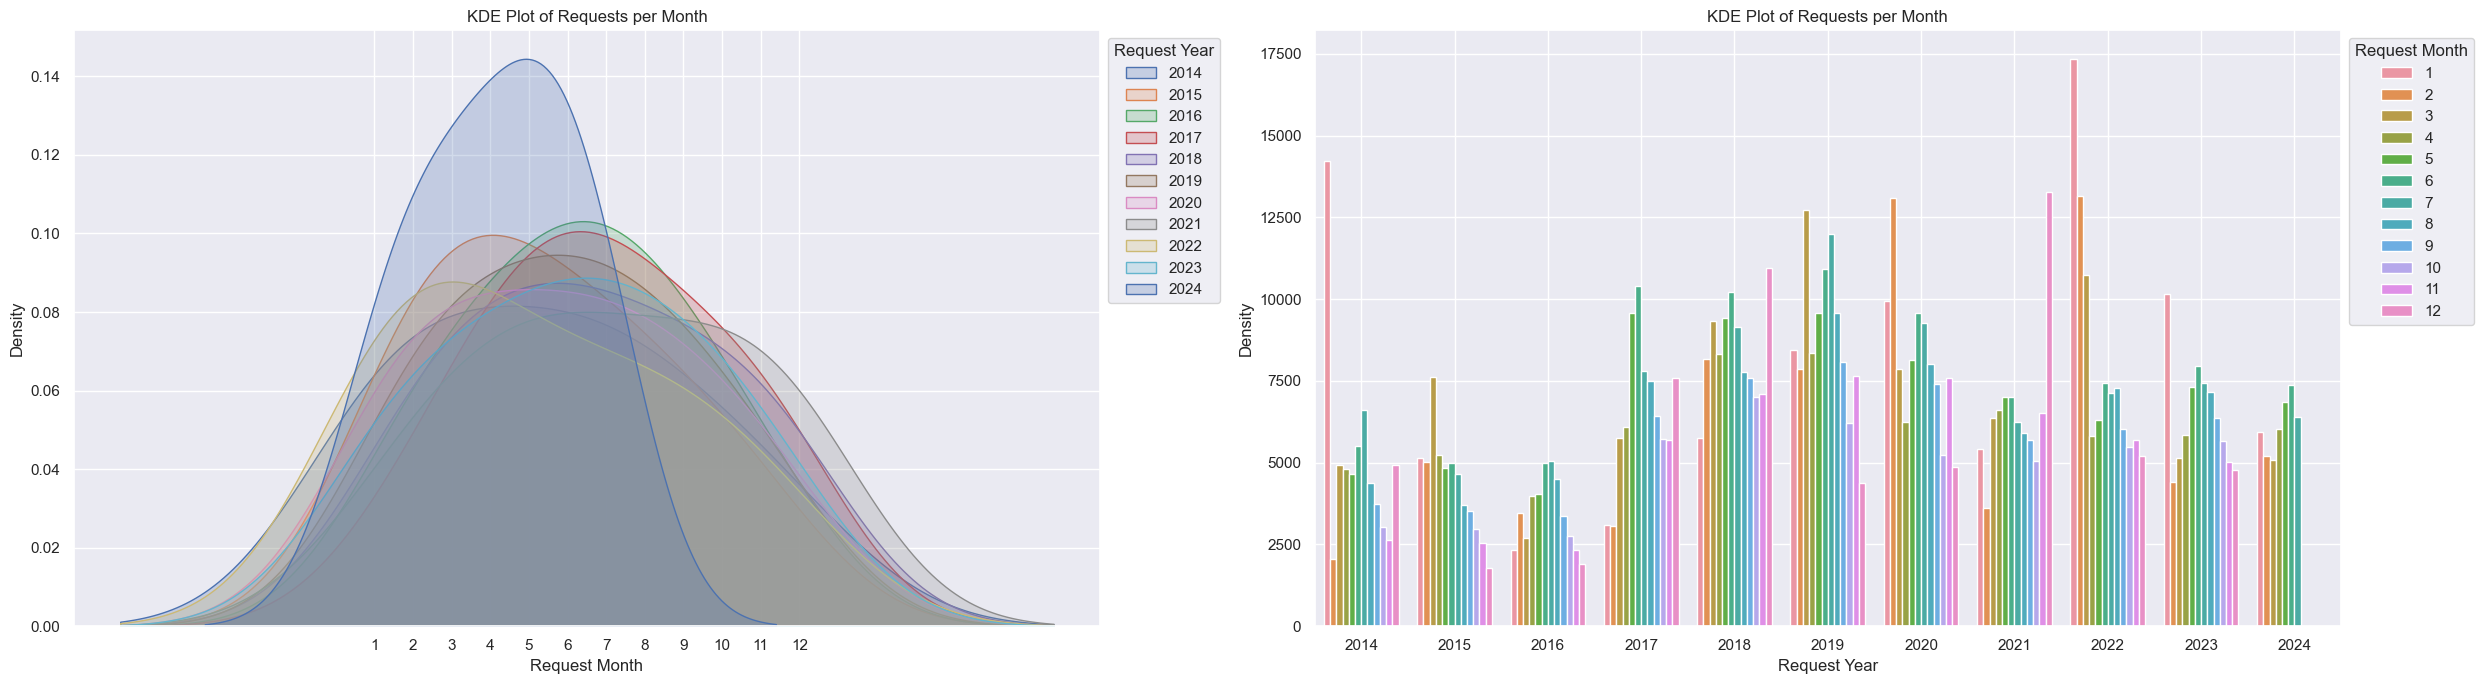

In [18]:
# Create KDE plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 7)) 

# Define a color palette for the years
palette = sns.color_palette("husl", len(request_year_month_counts['Request Year'].unique()))

# Plot KDE for each year
for year in request_year_month_counts['Request Year'].unique():
    subset = request_year_month_counts[request_year_month_counts['Request Year'] == year]
    sns.kdeplot(ax=axs[0],data=subset, x='Request Month', weights=subset['Count'], label=year, shade=True)

# Title and labels
axs[0].set_title('KDE Plot of Requests per Month')
axs[0].set_xlabel('Request Month')
axs[0].set_ylabel('Density')
axs[0].grid(True)
axs[0].set_xticks(range(1, 13)) 
axs[0].legend(title='Request Year', bbox_to_anchor=(1, 1), loc='upper left')


# Plot Barplot for each year
# Title and labels
sns.barplot(data=request_year_month_counts,x='Request Year',y='Count',hue='Request Month',ax=axs[1])
axs[1].set_title('KDE Plot of Requests per Month')
axs[1].set_xlabel('Request Year')
axs[1].set_ylabel('Density')
axs[1].grid(True)
#axs[1].set_xticks(range(1, 13)) 
axs[1].legend(title='Request Month', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()

plt.show()

Requests by Month and Day (Focusing on last 2 years)

In [19]:
# Count the number of requests per year
request_month_day_counts = data[(data['Request Year']==2024) | (data['Request Year']==2023) | (data['Request Year']==2022)].groupby(by=['Request Year','Request Month','Request Day']).size().reset_index(name='Count')
request_month_day_counts

,Request Year,Request Month,Request Day,Count
0,2022,1,1,81
1,2022,1,2,123
2,2022,1,3,163
3,2022,1,4,329
4,2022,1,5,354
...,...,...,...,...
930,2024,7,19,269
931,2024,7,20,247
932,2024,7,21,183
933,2024,7,22,353


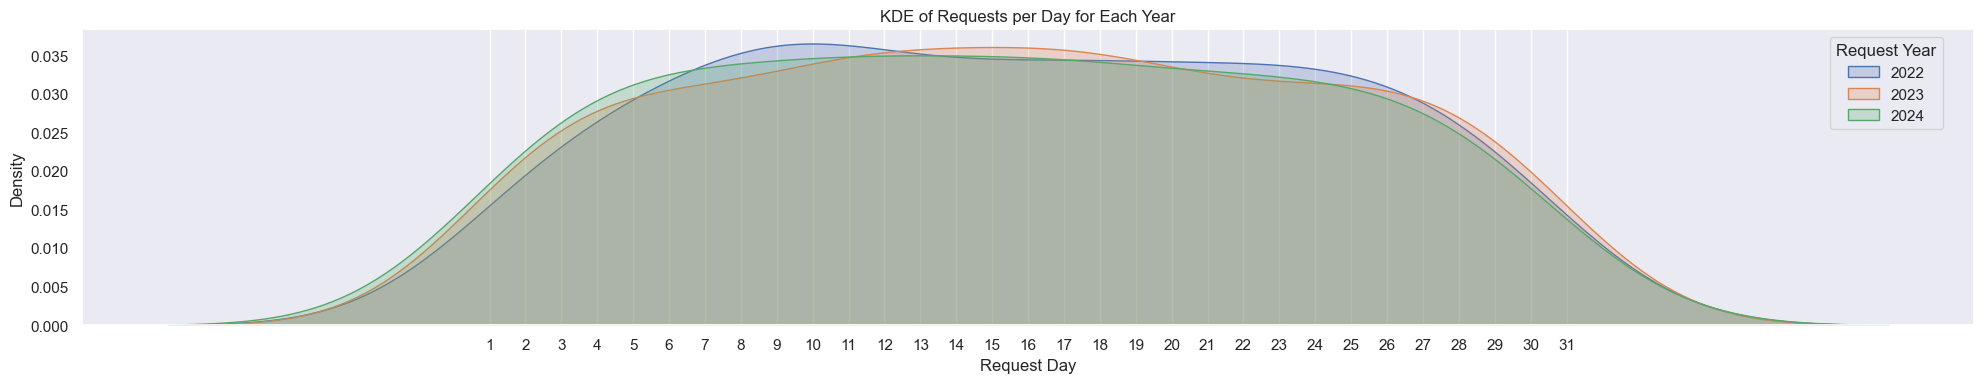

In [20]:
# Create KDE plot
plt.figure(figsize=(20, 4))

# Plot KDE for each year
for year in request_month_day_counts['Request Year'].unique():
    subset = request_month_day_counts[request_month_day_counts['Request Year'] == year]
    sns.kdeplot(data=subset, x='Request Day', weights=subset['Count'], label=year, shade=True)

# Title and labels
plt.title('KDE of Requests per Day for Each Year')
plt.xlabel('Request Day')
plt.ylabel('Density')
plt.legend(title='Request Year', bbox_to_anchor=(0.92, 1), loc='upper left')  # Adjust legend position
plt.xticks(range(1, 32))  # Days of the month (1-31)
plt.grid(axis='y')

plt.tight_layout()

plt.show()

Source Type Distribution

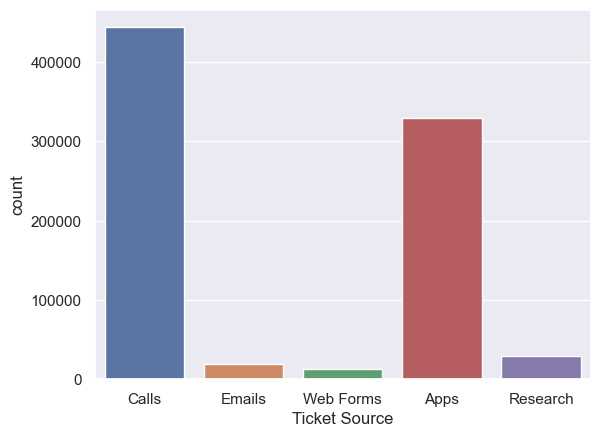

In [21]:
sns.countplot(data=data,x='Ticket Source',orient='h')
plt.show()

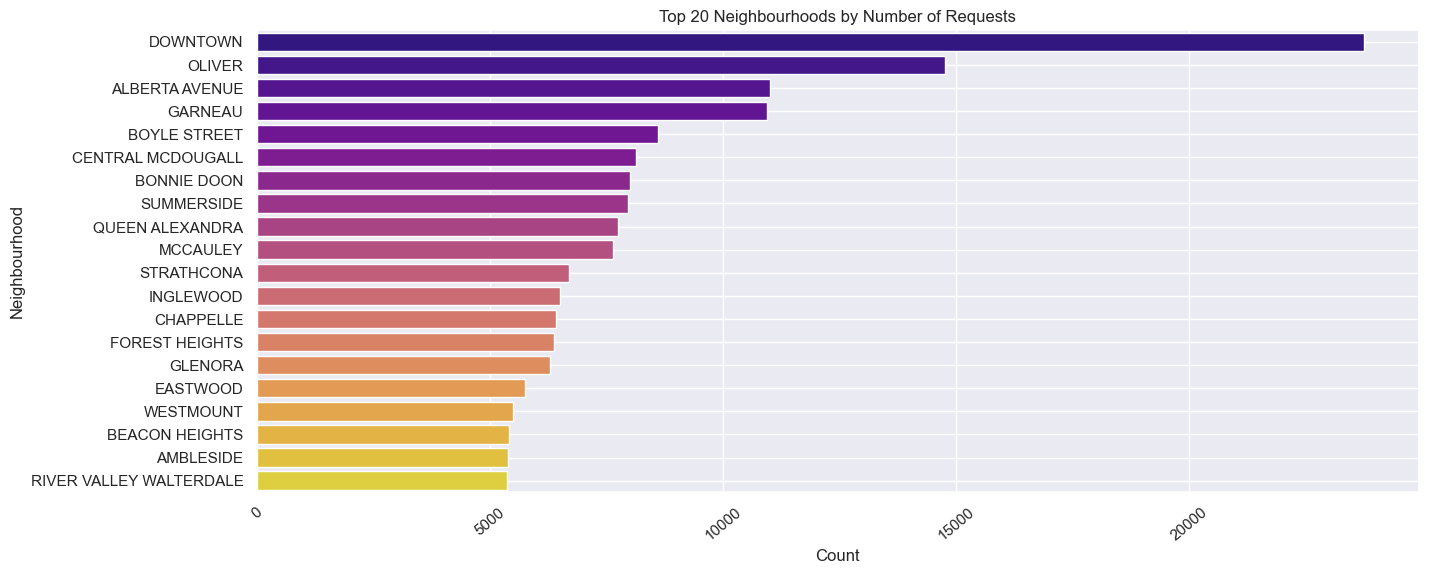

In [22]:
top_neighbourhoods = data['Neighbourhood'].value_counts().head(20)

plt.figure(figsize=(15,6))
sns.barplot(y=top_neighbourhoods.index, x=top_neighbourhoods.values, palette='plasma',orient='h')
plt.xticks(rotation=40)
plt.title('Top 20 Neighbourhoods by Number of Requests')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.grid(True)
plt.show()

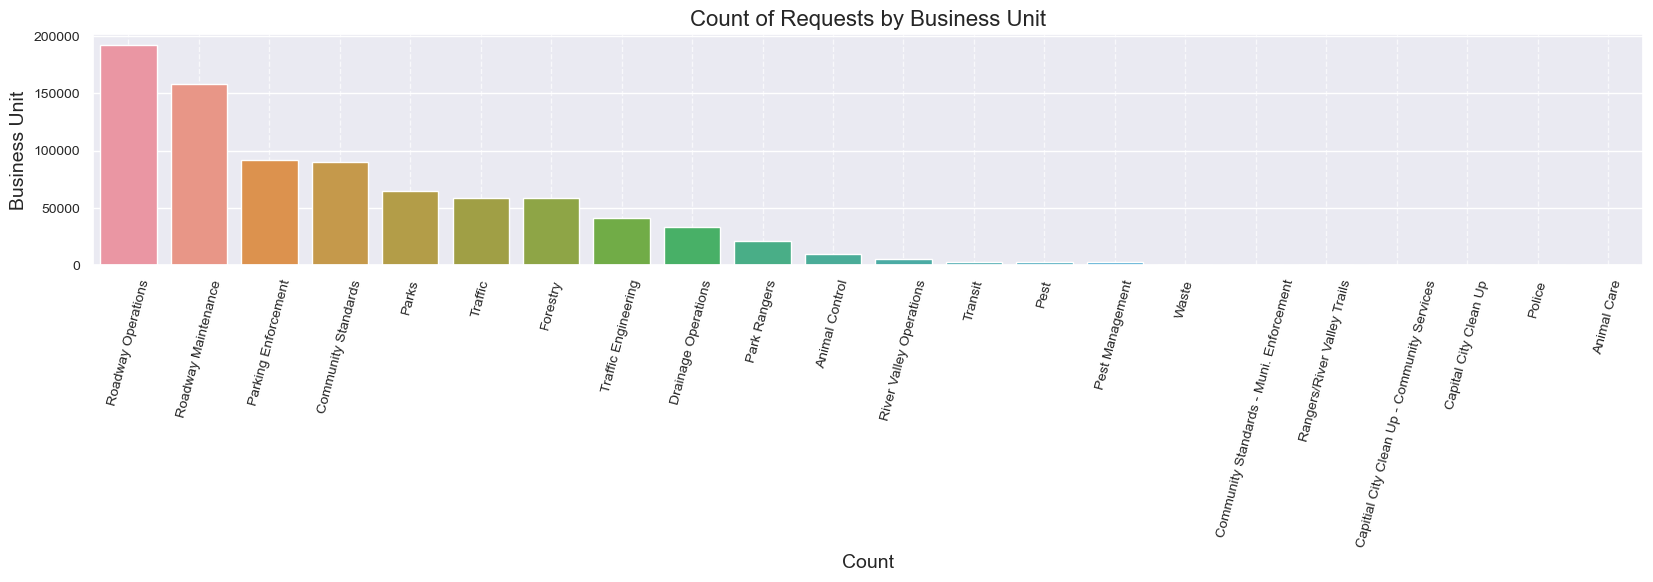

In [23]:

# Increase figure size and use horizontal bar plot
plt.figure(figsize=(20, 3))
sns.countplot(data=data, x='Business Unit', order=data['Business Unit'].value_counts()[:50].index)
plt.title('Count of Requests by Business Unit', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Business Unit', fontsize=14)
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

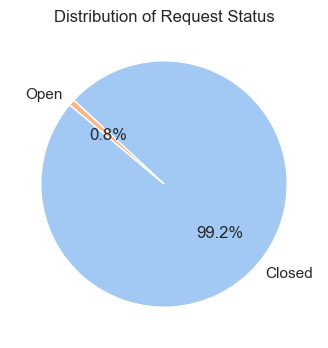

In [24]:
status_counts = data['Request Status'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Request Status')
plt.show()

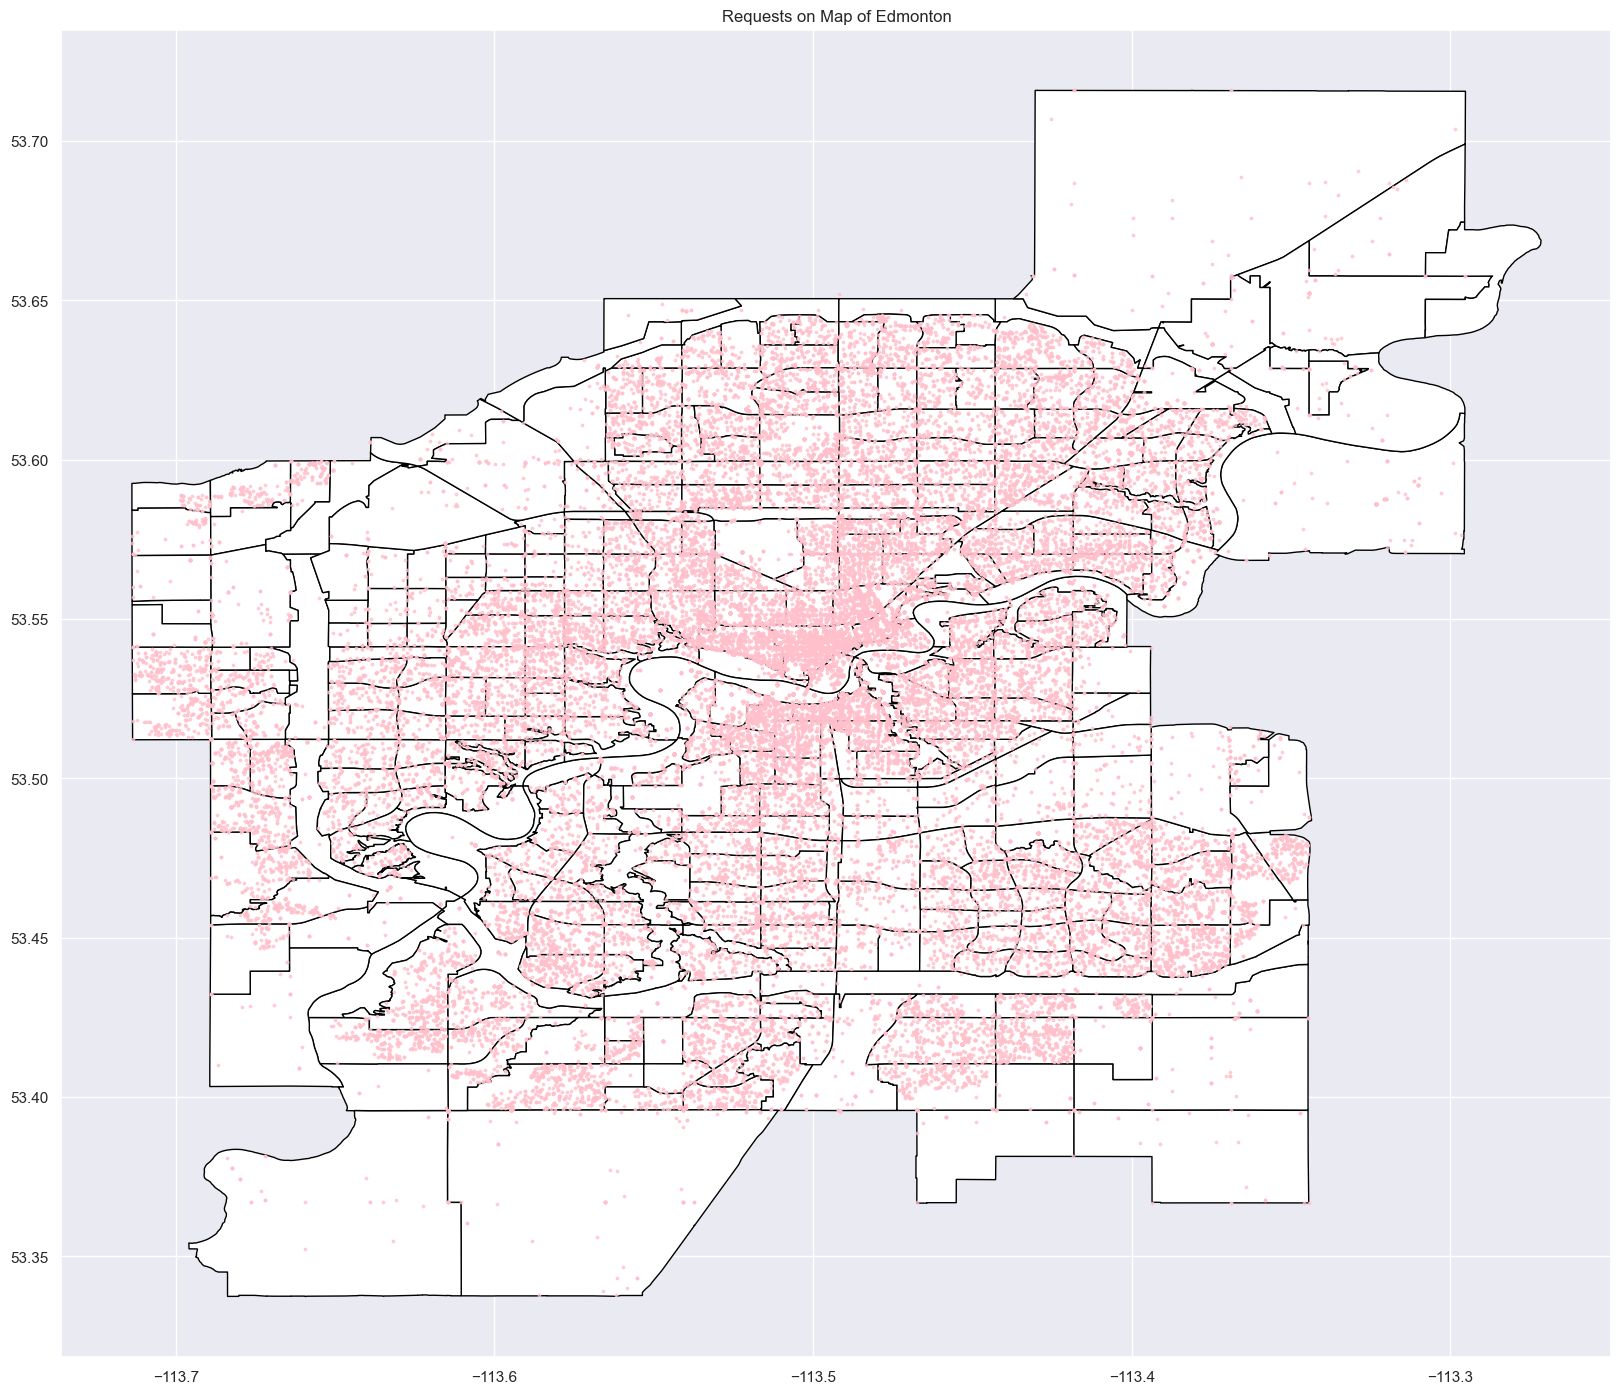

In [25]:
# Load Edmonton boundary shapefile
edmonton_boundary = gpd.read_file('..\shape-files\edmonton_neighbourhoods.shp')

# Create a GeoDataFrame with data
gdf = gpd.GeoDataFrame(data[data['Request Year']==2024], geometry=gpd.points_from_xy(data[data['Request Year']==2024]['Long'], data[data['Request Year']==2024]['Lat']))

# Plot
fig, ax = plt.subplots(figsize=(20, 20))
edmonton_boundary.plot(ax=ax, color='white', edgecolor='black')

# Plot requests with adjusted markers
gdf.plot(ax=ax, markersize=3, color='pink', alpha=0.7, legend=True)

plt.title('Requests on Map of Edmonton')
plt.show()


### Exploration

In [6]:
data['Ticket Source'].value_counts()

Ticket Source
Phone Call            444062
Mobile App            287518
Mobile App Generic     41333
ESRI MAP               28750
Email                  19280
Web Forms              13182
Name: count, dtype: int64

In [7]:
data['Ticket Source'] = data['Ticket Source'].replace({
    'Phone Call':'Calls',
    'Mobile App Generic' : 'Apps',
    'Mobile App' : 'Apps',
    'ESRI MAP':'Research',               
    'Email':'Emails'
})

In [8]:
data['Ticket Source'].value_counts()

Ticket Source
Calls        444062
Apps         328851
Research      28750
Emails        19280
Web Forms     13182
Name: count, dtype: int64

In [9]:
data['Service Category'].value_counts()

Service Category
Public Parking Complaints                 92177
Parking Enforcement                       89453
Maintenance - Snow & Ice                  81804
Snow & Ice Maintenance                    67598
Pothole                                   56079
Traffic Lights & Signs                    41909
Traffic Signals & Street Lights           36999
Drainage Maintenance                      36620
Litter & Waste                            35754
Road/Sidewalk Maintenance                 34644
Tree Maintenance                          32512
Litter                                    32148
Potholes                                  27440
Encampments                               21254
Street Signs                              21213
Collection & Disposal Services-Garbage    17052
Parks & Sportsfield Maintenance           16508
Broken Branch                             10432
Dead Animal Removal                        9691
Pruning                                    9366
Vandalism/Graffiti     

In [10]:
data['Business Unit'].value_counts(
)

Business Unit
Roadway Operations                             191948
Roadway Maintenance                            158111
Parking Enforcement                             92177
Community Standards                             90215
Parks                                           64435
Traffic                                         58825
Forestry                                        58501
Traffic Engineering                             41589
Drainage Operations                             33273
Park Rangers                                    21250
Animal Control                                   9714
River Valley Operations                          5338
Transit                                          3095
Pest                                             2382
Pest Management                                  2362
Waste                                             527
Community Standards - Muni. Enforcement           278
Rangers/River Valley Trails                        77
Capitial City 

### Feature Engineering

1. Extract Day, Month and Year from Date Created and Date Closed Feature

In [11]:
data['Request Month'] = data['Date Created'].dt.month
data['Request Day'] = data['Date Created'].dt.day
data = data.rename(
    columns={
        'Calendar Year' : 'Request Year',
        'Duration': 'Closing Duration'
    }
)

2. Hot Encoding Ticket Source

In [12]:
# Create dummy variables for 'Ticket Source'
dummies = pd.get_dummies(data['Ticket Source'], prefix='Source', dtype='int')

# Concatenate the original DataFrame with the new dummy variables
data = pd.concat([data, dummies], axis=1)

data.sample(2)

,Reference Number,Date Created,Date Closed,Request Status,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,...,Count,Geometry Point,Closing Duration,Request Month,Request Day,Source_Apps,Source_Calls,Source_Emails,Source_Research,Source_Web Forms
414589,340040999,2019-09-03,2019-09-04,Closed,Parking Enforcement,Abandoned Vehicle,Community Standards,RUTHERFORD,Heritage Point Community League,Ipiihkoohkanipiaohtsi,...,1,POINT (-113.5263982843781 53.42086606848465),1 days,9,3,1,0,0,0,0
306129,8018567814,2018-09-19,2018-10-09,Closed,Traffic Lights & Signs,Damaged Non-Emergency Signs (i.e. Speed Limit),Traffic Engineering,SPRUCE AVENUE,Spruce Avenue Community League,O-day'min,...,1,POINT (-113.4988199796743 53.56691219186449),20 days,9,19,1,0,0,0,0


In [26]:
data[['Date Created','Date Closed']] = data[['Date Created','Date Closed']].astype('str')

In [27]:
# Group by 'Date Created' and 'Neighbourhood' and count the occurrences
neighbourhood_wise = data.groupby(by=['Date Created', 'Neighbourhood']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Date Created' as columns and 'Neighbourhood' as index
neighbourhood_wise_pivot = neighbourhood_wise.pivot_table(index='Neighbourhood', columns='Date Created', values='Count', fill_value=0)
neighbourhood_wise_pivot


Date Created,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2024-07-14,2024-07-15,2024-07-16,2024-07-17,2024-07-18,2024-07-19,2024-07-20,2024-07-21,2024-07-22,2024-07-23
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
ABBOTTSFIELD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
ALBANY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
ALBERTA AVENUE,0.0,3.0,6.0,2.0,1.0,4.0,3.0,1.0,1.0,1.0,...,4.0,0.0,5.0,3.0,7.0,3.0,1.0,2.0,6.0,7.0
ALBERTA PARK INDUSTRIAL,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
ALCES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODCROFT,0.0,4.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0
YELLOWHEAD CORRIDOR EAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
YELLOWHEAD CORRIDOR WEST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
type(edmonton_gdf)

geopandas.geodataframe.GeoDataFrame

In [29]:
edmonton_gdf.head(10)

,Neighbourhood Name,Neighbourhood Number,Descriptive Name,Description,Effective Start Date,Effective End Date,Civic Ward,Planning District,Geometry Multipolygon
0,ABBOTTSFIELD,2010,Abbottsfield,"Abbottsfield was once owned by E.F. Carey, one...",1981-10-01,NaN,Métis,118 Avenue,"MULTIPOLYGON (((-113.388 53.576, -113.389 53.5..."
1,ALBANY,3460,Albany,NaN,2011-06-13,NaN,Anirniq,Northwest,"MULTIPOLYGON (((-113.560 53.632, -113.562 53.6..."
2,ALBERTA AVENUE,1010,Alberta Avenue,One of the city's older residential neighbourh...,1981-10-01,NaN,Métis,118 Avenue,"MULTIPOLYGON (((-113.492 53.577, -113.492 53.5..."
3,ALBERTA PARK INDUSTRIAL,4010,Alberta Park Industrial,This non-residential neighbourhood is largely ...,1981-10-01,NaN,Nakota Isga,Jasper Place,"MULTIPOLYGON (((-113.590 53.567, -113.590 53.5..."
4,ALCES,6669,Alces,Formerly Decoteau North,2019-07-25,NaN,Sspomitapi,NaN,"MULTIPOLYGON (((-113.376 53.425, -113.369 53.4..."
5,ALDERGROVE,4020,Aldergrove,"Planned in the 1970s, this area's multi-family...",1981-10-01,NaN,Nakota Isga,West Edmonton,"MULTIPOLYGON (((-113.652 53.520, -113.652 53.5..."
6,ALLARD,5458,Allard,NaN,2011-07-18,NaN,Ipiihkoohkanipiaohtsi,Southwest,"MULTIPOLYGON (((-113.517 53.407, -113.518 53.4..."
7,ALLENDALE,5010,Allendale,"Once farmed by the Allen family, this area was...",1981-10-01,NaN,papastew,Scona,"MULTIPOLYGON (((-113.503 53.506, -113.503 53.5..."
8,AMBLESIDE,5505,Ambleside,The name Ambleside most likely originates from...,2007-07-19,NaN,pihêsiwin,Southwest,"MULTIPOLYGON (((-113.570 53.425, -113.570 53.4..."
9,ANTHONY HENDAY,4011,Anthony Henday,This non-residential neighbourhood forms part ...,1981-10-01,NaN,Nakota Isga,West Henday,"MULTIPOLYGON (((-113.665 53.525, -113.666 53.5..."


In [30]:
edmonton_gdf = edmonton_gdf.rename(columns={
    'Neighbourhood Name':'Neighbourhood'
})

In [31]:
edmonton_gdf = edmonton_gdf[['Neighbourhood','Geometry Multipolygon']]

In [32]:
edmonton_gdf

,Neighbourhood,Geometry Multipolygon
0,ABBOTTSFIELD,"MULTIPOLYGON (((-113.388 53.576, -113.389 53.5..."
1,ALBANY,"MULTIPOLYGON (((-113.560 53.632, -113.562 53.6..."
2,ALBERTA AVENUE,"MULTIPOLYGON (((-113.492 53.577, -113.492 53.5..."
3,ALBERTA PARK INDUSTRIAL,"MULTIPOLYGON (((-113.590 53.567, -113.590 53.5..."
4,ALCES,"MULTIPOLYGON (((-113.376 53.425, -113.369 53.4..."
...,...,...
398,WOODCROFT,"MULTIPOLYGON (((-113.566 53.569, -113.566 53.5..."
399,YELLOWHEAD CORRIDOR EAST,"MULTIPOLYGON (((-113.445 53.584, -113.445 53.5..."
400,YELLOWHEAD CORRIDOR WEST,"MULTIPOLYGON (((-113.492 53.585, -113.494 53.5..."
401,YORK,"MULTIPOLYGON (((-113.429 53.607, -113.430 53.6..."


In [33]:
edmonton_gdf.shape

(403, 2)

In [34]:
data['Neighbourhood'].nunique()

403

In [35]:
for name in data['Neighbourhood'].unique():
    if name not in edmonton_gdf['Neighbourhood'].unique():
        print(name)

In [36]:
neighbourhood_wise_pivot.columns

Index(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
       '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
       ...
       '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
       '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23'],
      dtype='object', name='Date Created', length=3857)

In [37]:
#merging the 'neighbourhood_wise_pivot' with 'edmonton boundaries data'
merge = edmonton_gdf.join(neighbourhood_wise_pivot,on='Neighbourhood',how='right')
merge

,Neighbourhood,Geometry Multipolygon,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2024-07-14,2024-07-15,2024-07-16,2024-07-17,2024-07-18,2024-07-19,2024-07-20,2024-07-21,2024-07-22,2024-07-23
0,ABBOTTSFIELD,"MULTIPOLYGON (((-113.388 53.576, -113.389 53.5...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
1,ALBANY,"MULTIPOLYGON (((-113.560 53.632, -113.562 53.6...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,ALBERTA AVENUE,"MULTIPOLYGON (((-113.492 53.577, -113.492 53.5...",0.0,3.0,6.0,2.0,1.0,4.0,3.0,1.0,...,4.0,0.0,5.0,3.0,7.0,3.0,1.0,2.0,6.0,7.0
3,ALBERTA PARK INDUSTRIAL,"MULTIPOLYGON (((-113.590 53.567, -113.590 53.5...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ALCES,"MULTIPOLYGON (((-113.376 53.425, -113.369 53.4...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,WOODCROFT,"MULTIPOLYGON (((-113.566 53.569, -113.566 53.5...",0.0,4.0,3.0,0.0,2.0,2.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0
399,YELLOWHEAD CORRIDOR EAST,"MULTIPOLYGON (((-113.445 53.584, -113.445 53.5...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
400,YELLOWHEAD CORRIDOR WEST,"MULTIPOLYGON (((-113.492 53.585, -113.494 53.5...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,YORK,"MULTIPOLYGON (((-113.429 53.607, -113.430 53.6...",0.0,3.0,2.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [38]:
merge.columns

Index(['Neighbourhood', 'Geometry Multipolygon', '2014-01-01', '2014-01-02',
       '2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
       '2014-01-08',
       ...
       '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
       '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23'],
      dtype='object', length=3859)

In [39]:
dates = merge.columns.to_list()

In [40]:
dates[2:]

['2014-01-01',
 '2014-01-02',
 '2014-01-03',
 '2014-01-04',
 '2014-01-05',
 '2014-01-06',
 '2014-01-07',
 '2014-01-08',
 '2014-01-09',
 '2014-01-10',
 '2014-01-11',
 '2014-01-12',
 '2014-01-13',
 '2014-01-14',
 '2014-01-15',
 '2014-01-16',
 '2014-01-17',
 '2014-01-18',
 '2014-01-19',
 '2014-01-20',
 '2014-01-21',
 '2014-01-22',
 '2014-01-23',
 '2014-01-24',
 '2014-01-25',
 '2014-01-26',
 '2014-01-27',
 '2014-01-28',
 '2014-01-29',
 '2014-01-30',
 '2014-01-31',
 '2014-02-01',
 '2014-02-02',
 '2014-02-03',
 '2014-02-04',
 '2014-02-05',
 '2014-02-06',
 '2014-02-07',
 '2014-02-08',
 '2014-02-09',
 '2014-02-10',
 '2014-02-11',
 '2014-02-12',
 '2014-02-13',
 '2014-02-14',
 '2014-02-15',
 '2014-02-16',
 '2014-02-17',
 '2014-02-18',
 '2014-02-19',
 '2014-02-20',
 '2014-02-21',
 '2014-02-22',
 '2014-02-23',
 '2014-02-24',
 '2014-02-25',
 '2014-02-26',
 '2014-02-27',
 '2014-02-28',
 '2014-03-01',
 '2014-03-02',
 '2014-03-03',
 '2014-03-04',
 '2014-03-05',
 '2014-03-06',
 '2014-03-07',
 '2014-03-

In [ ]:
for dates in merge.columns.to_list()[2:10]:
    print(merge.columns)

In [81]:
from textwrap import wrap

def wrap_text(text, width):
    """Wrap text to fit within the specified width."""
    return '\n'.join(wrap(text, width))

# Create an empty list to store image frames
image_frames = []

# Loop through each date column and plot the data
for dates in merge.columns.to_list()[2:10]:
    fig, ax = plt.subplots(figsize=(14, 14))
    merge.plot(column=dates,
               cmap='Blues',  # Colormap
               ax=ax,
               legend=False,
               edgecolor='black',
               linewidth=0.4)

    # Add title and remove axis
    ax.set_title('Request received per day since ' + dates, fontdict={'fontsize': 20}, pad=12.5)
    ax.set_axis_off()

    # Sort neighborhoods by request counts for the current date and select top 20
    top_neighborhoods = merge.sort_values(by=dates, ascending=False).head(20)

    # Add top 20 neighborhood names as text annotations
    for _, row in top_neighborhoods.iterrows():
        if pd.notna(row[dates]):  # Ensure there's data for this date
            x, y = row['Geometry Multipolygon'].centroid.xy
            
            # Wrap the text to fit better within the bounds
            wrapped_text = wrap_text(row['Neighbourhood'], width=15)  # Adjust width as needed
            
            ax.text(x[0], y[0], wrapped_text,
                    fontsize=8,  # Adjust font size as needed
                    ha='center', va='center',
                    color='black', weight='normal',
                    bbox=dict(facecolor=None, edgecolor='none', alpha=0))  # No background color

    # Save the plot to a BytesIO object
    f = io.BytesIO()
    plt.savefig(f, format='png', bbox_inches='tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))

# Save all the images as a GIF file
image_frames[0].save('Dynamic_311_Requests.gif', format='GIF',
                     append_images=image_frames[1:],
                     save_all=True,
                     duration=1000,  # Duration of each frame in milliseconds
                     loop=0)
f.close()
plt.close(ax.figure)  # Close the figure to avoid memory issues